„Åì„ÅÆÁ´†„Åß„ÅØ„ÄÅVisionTransformerÔºàViTÔºâ„ÇíÂèñ„ÇäÊâ±„ÅÑ„Åæ„Åô„ÄÇ

ÂâçÂõû„Åæ„Åß„ÅÆTransformer„ÅÆÁü•Ë≠ò„Åå„Éï„É´„ÅßÊ¥ª„Åã„Åõ„Çã„ÅÆ„Åß„ÄÅ„Å©„ÅÜ„Åû‰ΩìÈ®ì„Åó„Å¶„ÅÑ„Å£„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

In [88]:
# „ÉÜ„É≥„ÇΩ„É´„ÇíË¶ã„ÇÑ„Åô„ÅèË°®Á§∫„Åô„ÇãÈñ¢Êï∞Ôºà„Çπ„Ç≠„ÉÉ„Éó„Åó„Å¶„ÇÇÊßã„ÅÑ„Åæ„Åõ„ÇìÔºâ
import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("ÂêçÂâç", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """
    

    # ÂºïÊï∞„Åã„Çâ„ÉÜ„É≥„ÇΩ„É´„Å®ÂêçÂâç„ÇíÊ±∫ÂÆö„Åô„Çã
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Tensor„Çí„É™„Çπ„Éà„Å´Â§âÊèõ„Åô„Çã
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """ÂÜçÂ∏∞ÁöÑ„Å´ÂÖ•„ÇåÂ≠ê„Å´„Å™„Å£„Åü„É™„Çπ„Éà„ÇíÊï¥ÂΩ¢„Åó„Å¶ÊñáÂ≠óÂàó„ÇíËøî„Åô"""
        # ÂÜÖÂÆπ„Åå„É™„Çπ„Éà„ÅÆÂ†¥Âêà„ÅØÂÜçÂ∫¶Ëøî„Åô
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # Êï∞Â≠ó„É™„Çπ„Éà„ÅÆÂ†¥Âêà
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # „Éï„Ç©„Éº„Éû„ÉÉ„ÉàÊ∏à„ÅøÊñáÂ≠óÂàóÔºàÊúÄÂ§ñÊû†„ÅÆËßíÊã¨Âºß„ÅØÂâäÈô§„Åï„Çå„Åæ„ÅôÔºâ
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # ÁµêÊûúÂá∫Âäõ
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")



torch.manual_seed(1337)


# Chapter 1Ôºö„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø 

‰ªäÂõû„ÅØCIFAR-10„Å®„ÅÑ„ÅÜ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÁî®„ÅÑ„Åæ„Åô„ÄÇ

„Åæ„Åö„ÅØ„Éá„Éº„Çø„Çª„ÉÉ„Éà„Å´„Å§„ÅÑ„Å¶Áü•„Å£„Å¶„Åä„Åç„Åæ„Åó„Çá„ÅÜ„ÄÇÊ©üÊ¢∞Â≠¶Áøí„Ç®„É≥„Ç∏„Éã„Ç¢„ÅÆÁ¨¨‰∏ÄÊ≠©„Åß„Åô„ÄÇ

CIFAR-10„ÅØCanadian Institute for Advanced Research„Å®„ÅÑ„ÅÜ„Ç´„Éä„ÉÄÊîøÂ∫ú„ÄÅ„Ç¢„É´„Éê„Éº„ÇøÂ∑û„Åä„Çà„Å≥„Ç±„Éô„ÉÉ„ÇØÂ∑û„ÅÆÊè¥Âä©„ÇíÂæó„ÅüÁ†îÁ©∂Ê©üÈñ¢„ÅåÂèñ„Çä„Åæ„Å®„ÇÅ„Åü„Éá„Éº„Çø„Çª„ÉÉ„Éà„Åß„ÄÅ60,000Êûö„ÅÆÁîªÂÉè„Çí10„ÇØ„É©„Çπ„Å´ÂàÜÈ°û„Åô„Çã„Åü„ÇÅ„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„Åß„Åô„ÄÇ

21‰∏ñÁ¥Ä„Å´ÂÖ•„Çä„ÄÅHintonÂÖàÁîü„ÇÑLeCunÂÖàÁîü„ÄÅBengioÂÖàÁîü„Å™„Å©„ÅÆ„ÅîÊ¥ªË∫ç„ÇÇ„ÅÇ„Çä„ÄÅ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅåÊï¥ÂÇô„Åï„Çå„Åæ„Åó„Åü„ÄÇ„ÅÑ„ÇÑ„ÄúÊú¨ÂΩì„Å´„ÅÇ„Çä„Åå„Åü„ÅÑÈôê„Çä„Åß„Åô„Å≠„ÄÇ

‰∏≠Ë∫´„ÇíË¶ã„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [89]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch

In [90]:
import torchvision

trainset=torchvision.datasets.CIFAR10(root=r'.', 
                          train=True, download=True)

Files already downloaded and verified


„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ¶ÇË¶Å„ÇíË¶ã„Å¶„Åø„Åæ„Åô„ÄÇ

In [91]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: .
    Split: Train

names„É™„Çπ„Éà„Çí‰ΩúÊàê„Åó„Åæ„Åô„ÄÇ„Åì„Çå„ÅØCIFAR10„Éá„Éº„Çø„Çª„ÉÉ„Éà„Åß„ÅØ„Åù„Çå„Åû„Çå„ÅÆ„ÇØ„É©„Çπ„É©„Éô„É´„Åå0-9„Å®„Å™„Å£„Å¶„Åä„Çä„ÄÅ„Åù„Çå„Å´ÂØæÂøú„Åô„ÇãË®ÄËëâ„ÇíÊåØ„Å£„Åü„Åª„ÅÜ„ÅåË¶ã„ÇÑ„Åô„ÅÑ„Åã„Çâ„Åß„Åô„Å≠„ÄÇ

In [92]:
names = ['plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']

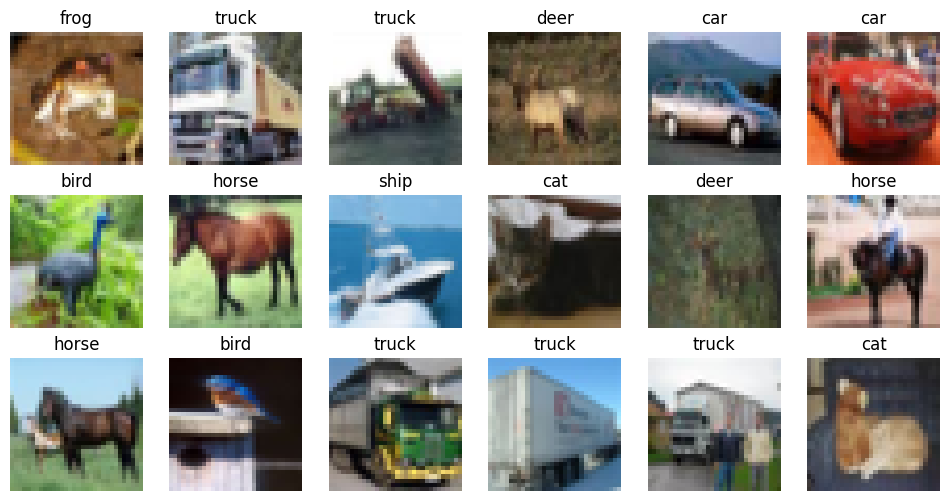

In [93]:
import matplotlib.pyplot as plt
import numpy as np 

# Create a 3 by 6 grid of pictures
plt.figure(figsize=(12,6),dpi=100)
for i in range(3):
    for j in range(6):
        plt.subplot(3, 6, 6*i+j+1)
        plt.imshow(trainset[6*i+j][0])
        plt.axis('off')
        plt.title(names[trainset[6*i+j][1]], fontsize=12)
plt.subplots_adjust(hspace=0.20)
plt.show()

Ëã•Âπ≤ÁîªÂÉè„ÅåÁ≤ó„ÇÅ„Åß„Åô„Åå„ÄÅ„Å™„Çì„Å®„Å™„Åè„ÅØÂàÜ„Åã„Çã„Å®ÊÄù„ÅÑ„Åæ„Åô„ÄÇ„Å®„ÅÑ„ÅÜ„Åã„Å™„Çì„Å®„Å™„Åè„Çè„Åã„Å£„Å¶„Åó„Åæ„ÅÜ‰∫∫Èñì„ÅÆË¶ñË¶ö„Å£„Å¶‰∏çÊÄùË≠∞„Å†„Å™„ÄÅ„ÄÅ„ÄÅ

‰ªñ„ÅÆÁîªÂÉè„Åß„ÇÇË¶ã„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [94]:
testset=torchvision.datasets.CIFAR10(root=r'.', 
                          train=False, download=True)

Files already downloaded and verified


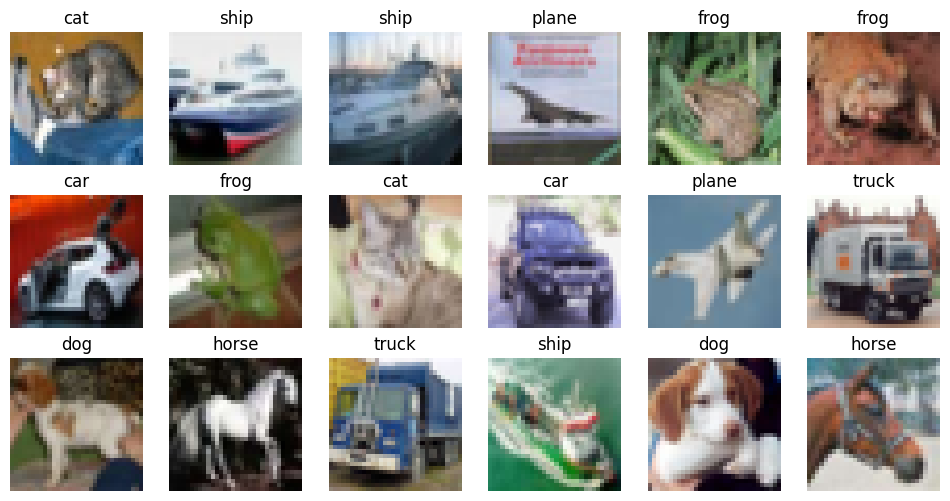

In [95]:
plt.figure(figsize=(12,6),dpi=100)
for i in range(3):
    for j in range(6):
        plt.subplot(3, 6, 6*i+j+1)
        plt.imshow(testset[6*i+j][0])
        plt.axis('off')
        plt.title(names[testset[6*i+j][1]], fontsize=12)
plt.subplots_adjust(hspace=0.20)
plt.show()

# Chapter 2ÔºöÁîªÂÉèÂ§âÊèõ

„Åï„Å¶„ÄÅÁèæÂú®„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅØPython„ÅÆ„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„Å´„Å™„Å£„Å¶„ÅÑ„Åæ„Åô„ÄÇ</br>
„Åì„Çå„ÇíPyTorch„ÅßÊâ±„Åà„Çã„ÉÜ„É≥„ÇΩ„É´„Å´„Åó„Åæ„Åó„Çá„ÅÜ„ÄÇ</br>
„Åù„ÅÆÈöõ„ÄÅÊ©üÊ¢∞Â≠¶Áøí„ÅÆ‰∏ñÁïå„Åß„ÅØ„ÄåÁîªÂÉèÂ§âÊèõ„Äç„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ„Åì„Çå„ÅØÂêå„ÅòÁîªÂÉè„Åß„ÇÇ‰Ωï„Åã„Åó„Çâ„ÅÆÁîªÂÉèÂ§âÊèõ„ÇíË°å„ÅÜ„Åì„Å®„Åß„ÄÅÁîªÂÉè„Å´Â§öÊßòÊÄß„ÇíÂá∫„Åô„Åü„ÇÅ„ÅÆ„ÇÇ„ÅÆ„Åß„Åô„ÄÇ

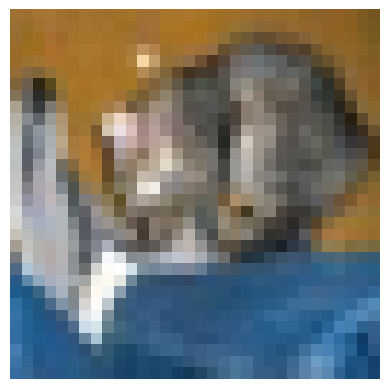

In [96]:
img, label = testset[0]  # 1„Å§ÁõÆ„ÅÆÁîªÂÉè„Å®„É©„Éô„É´

# ÁîªÂÉè„ÇíË°®Á§∫„Åô„ÇãÈñ¢Êï∞ÔºàTensor„ÇÇPIL„ÇÇOKÔºâ
def show(img, title=""):
    if isinstance(img, torch.Tensor):
        # Normalize„Åï„Çå„Åü„ÇÇ„ÅÆ„ÅØÂèØË¶ñÂåñÁî®„Å´ÈÄÜÂ§âÊèõ
        img = img.clone()
        img = img * 0.5 + 0.5  # mean=0.5, std=0.5 „ÇíÊàª„Åô
        img = img.permute(1, 2, 0)  # (C,H,W)‚Üí(H,W,C)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()
    
show(img) #ÊúÄÂàù„ÅÆÁîªÂÉè„ÇíË¶ã„Çã

„Éà„É†„Ç∏„Çß„É™ÊÑü„Åô„Åî„ÅÑ„Å™</br>
„Åï„Å¶„Åì„Åì„Åã„ÇâÁîªÂÉèÂ§âÊèõ„ÇíÈÄ≤„ÇÅ„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ

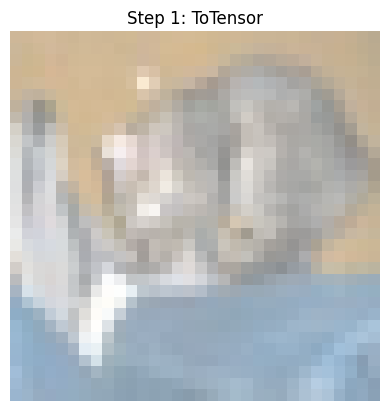

In [97]:
# TODO: ÁîªÂÉè„Çí„ÉÜ„É≥„ÇΩ„É´„Å´Â§âÊèõ„Åó„Åæ„Åô
to_tensor = transforms.ToTensor()
img1 = to_tensor(img)
show(img1, "Step 1: ToTensor")

ÁîªÁ¥†ÂÄ§„Åå0-255„Åã„Çâ0-1„Å´Ê≠£Ë¶èÂåñ„Åï„Çå„Åü„Åì„Å®„Åß„ÄÅËâ≤„ÅåËñÑ„Åè„Å™„Å£„Å¶„ÅÑ„Çã„Åì„Å®„Åå„Çè„Åã„Çä„Åæ„Åô„ÄÇ

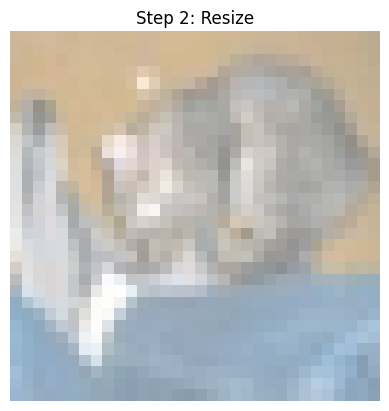

In [98]:
#TODO ÁîªÂÉè„Çí„É™„Çµ„Ç§„Ç∫„Åó„Åæ„Åô
resize = transforms.Resize((32, 32), antialias=True)
img2 = resize(img1)
show(img2, "Step 2: Resize")

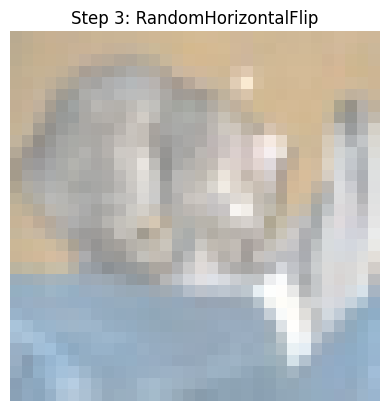

In [99]:
#TODO ÁîªÂÉè„Çí„É©„É≥„ÉÄ„É†„Å´Â∑¶Âè≥„Å´ÂèçËª¢„Åï„Åõ„Åæ„Åô
flip = transforms.RandomHorizontalFlip(p=1.0)
img3 = flip(img2)
show(img3, "Step 3: RandomHorizontalFlip")


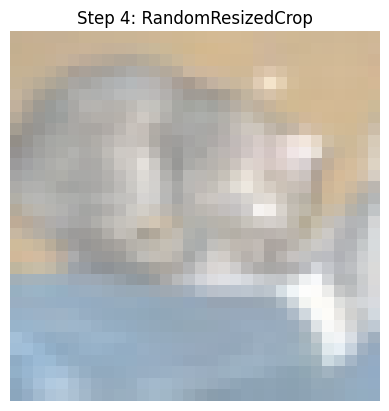

In [100]:
# TODO ÁîªÂÉè„Çí‰∏ÄÂÆö„ÅÆÁ¢∫Áéá„ÅßÂàá„ÇäÂèñ„Çä„Åæ„Åô„ÄÇ
torch.manual_seed(0)
crop = transforms.RandomResizedCrop((32, 32), scale=(0.8, 1.0),
                                    ratio=(0.75, 1.3333),
                                    interpolation=2, antialias=True)
img4 = crop(img3)
show(img4, "Step 4: RandomResizedCrop")

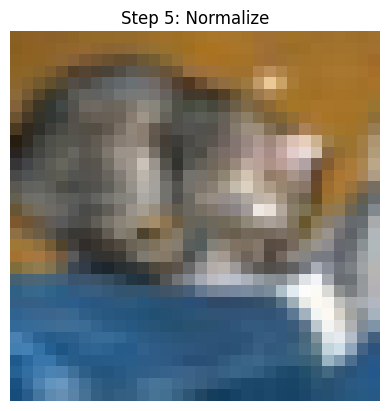

In [101]:
#TODO ÁîªÂÉè„ÇíÊ≠£Ë¶èÂåñ„Åï„Åõ„Åæ„Åô„ÄÇ
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
img5 = normalize(img4)
show(img5, "Step 5: Normalize")

In [102]:
#‰∏äË®ò„ÅÆÂá¶ÁêÜ„ÇíÔºë„Å§„Å´„Åæ„Å®„ÇÅ„Åü„Ç§„É≥„Çπ„Çø„É≥„Çπ
import torchvision.transforms as transforms

trainset.transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((32, 32),antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop((32, 32), scale=(0.8, 1.0),
                 ratio=(0.75, 1.3333333333333333), 
                 interpolation=2,antialias=True),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testÂÅ¥„ÇÇÂêåÊßò„Å´Âá¶ÁêÜ„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ„Åì„ÅÆ„Å®„ÅçÂèçËª¢„ÇÑRandomCrop„ÅØÂÖ•„Çå„Åæ„Åõ„Çì„ÄÇ

Ôºú„Å™„ÅúÔºüÔºû

In [103]:
import torch

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                            shuffle=True)
testset.transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((32, 32),antialias=True),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                        shuffle=False)


# Chapter3 Patch Encoding

ViT„ÅØÁ∞°Âçò„Å´Ë®Ä„Åà„Å∞ÁîªÂÉèÂêë„Åë„ÅÆTransformer„Åß„Åô„ÄÇ</br>
Transformer„ÅØÂçòË™ûÁîüÊàê„Å™„Å©„ÅÆÁ≥ªÂàóÊÉÖÂ†±„ÅÆ‰∫àÊ∏¨„Å´Âà©Áî®„Åï„Çå„Å¶„ÅÑ„Åæ„Åó„Åü„Åå„ÄÅViT„Åß„ÅØÁîªÂÉè„ÇíTransformer„Å´ÂøúÁî®„Åó„Åæ„Åô„ÄÇ</br>
„Åù„ÅÆ„Åü„ÇÅ„Å´„ÅØ„ÄÅÁîªÂÉè„Çí„ÄåÁ≥ªÂàóÊÉÖÂ†±„Äç„Å´Â§âÊèõ„Åó„Å™„Åë„Çå„Å∞„Å™„Çä„Åæ„Åõ„Çì„ÄÇ„Åì„Åì„ÅÆ„Ç¢„Ç§„Éá„Ç¢„ÅØ„ÄÅÁï≥„ÅøËæº„Åø„Åß„ÇÇÁîªÂÉè„ÇíÔºëÊ¨°ÂÖÉ„Å´Â§âÊèõ„Åó„Å¶ÂÖ®ÁµêÂêàÂ±§„Å´„Å§„Å™„Åí„Çã„ÄÅ„Å®„ÅÑ„ÅÜËÄÉ„Åà„Çí„Åó„Åü„ÅÆ„Å®ÂêåÊßò„Å´„ÄÅÁîªÂÉè„ÇíÁ¥∞„Åã„ÅÑÂçò‰Ωç„Å´ÂàÜÂâ≤„Åó„Å¶„ÄÅ„Åù„Çå„ÇíÊ®™‰∏ÄÂàó„Å´„Å™„Çâ„Åπ„Å¶„ÄåÁ≥ªÂàóÊÉÖÂ†±„Äç„Å®„Åô„Çã„Åì„Å®„Åßtransformer„ÇíÂôõ„Åæ„Åõ„Åæ„Åô„ÄÇ

„Åì„ÅÆÂãïÁîª„ÅÆ„Çà„ÅÜ„Å´„ÄÅÁîªÂÉè„Çí„ÅÑ„Åè„Å§„Åã„ÅÆ„Ç≥„Éû„Å´ÂàÜÂâ≤„Åó„Å¶‰∏¶„Åπ„ÇãÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ</br>
„Åì„ÅÆÊñπÊ≥ï„Çí„Äåpatch encoding„Äç„Å®„ÅÑ„ÅÑ„Åæ„Åô„ÄÇ</br>
„Åù„Çå„Åß„ÅØ„Åï„Å£„Åù„Åè„ÄÅ„Åì„ÅÆ‰∏≠„ÅÆÁîªÂÉè„ÇíÔºë„Å§Âèñ„Å£„Å¶„Åç„Å¶„ÄÅpatch encoding„ÇíÂÆüË£Ö„Åó„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [104]:
#ÂèØËÉΩ„Å™„ÇâcudaÁí∞Â¢É„ÇíÁî®„ÅÑ„Åæ„Åô„ÄÇ
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


class„ÇíÂÆöÁæ©„Åó„Åæ„Åô„ÄÇpatch encoding„ÅÆ„Åü„ÇÅ„Å´ÂøÖË¶Å„Å™ÊÉÖÂ†±„Åß„Åô„ÄÇ

In [105]:
class Config:
    patch_size=8
    hidden_size=48
    num_hidden_layers=4
    num_attention_heads=4
    intermediate_size= 4 * 48
    image_size=32
    num_classes=10 
    num_channels=3
config=Config()

config„ÅÆÂÜÖÂÆπ„ÇíÂèçÊò†„Åï„Åõ„Åæ„Åó„Çá„ÅÜ„ÄÇ</br>
üîò **Options**: ‰ª•‰∏ã„ÅÆÈÅ∏ÊäûËÇ¢„Åã„ÇâÈÅ∏„Å≥„Åæ„Åó„Çá„ÅÜ„ÄÇ„ÅÑ„Çâ„Å™„ÅÑ„ÇÇ„ÅÆ„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„Çã„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ

`nn.Module`‚ÄÉ‚ÄÉ`config.patch_size`‚ÄÉ‚ÄÉ`config.patch_size` `zero` `config()`


In [106]:
import torch.nn as nn

class PatchEmbeddings(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.projection = nn.Conv2d(config.num_channels,
                                    config.hidden_size, 
                                    kernel_size=config.patch_size, 
                                    stride=config.patch_size)
    def forward(self, x):
        x = self.projection(x)
        x = x.flatten(2).transpose(1, 2)
        return x  

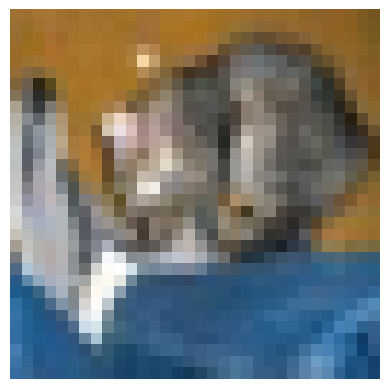

In [107]:
show(img)

tokens.shape: (1, 16, 48)


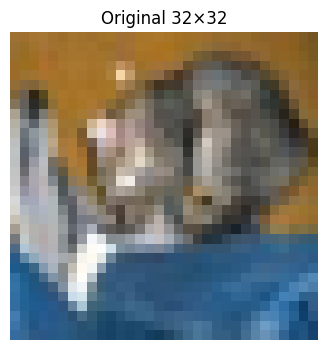

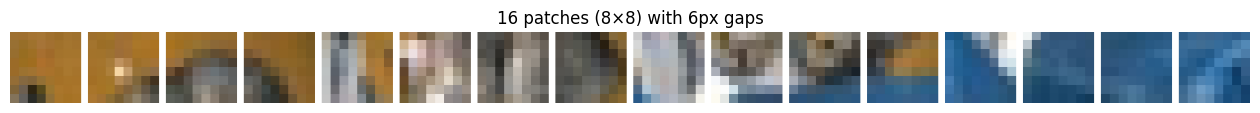

In [108]:
#„Åì„Åì„ÅÆÁêÜËß£„ÅØÈõ£„Åó„ÅÑ„ÅÆ„Åß‰∏çË¶Å
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

patcher = PatchEmbeddings(config)

# img -> [3,32,32] CHW, [0..1] „Å´Êï¥ÂΩ¢ÔºàÂøÖË¶Å„Å™„ÇâÂ§âÊèõÔºâ
def to_chw32(img, image_size=32):
    if isinstance(img, np.ndarray):
        arr = img.astype(np.float32)
        if arr.max() > 1.0: arr /= 255.0
        if arr.ndim == 3 and arr.shape[-1] == 3:
            t = torch.from_numpy(arr).permute(2,0,1).contiguous()
        elif arr.ndim == 3 and arr.shape[0] == 3:
            t = torch.from_numpy(arr)
        else:
            raise ValueError("numpy img must be HWC(‚Ä¶ ,‚Ä¶,3) or CHW(3,‚Ä¶, ‚Ä¶).")
    elif isinstance(img, torch.Tensor):
        t = img
        if t.ndim != 3: raise ValueError("torch img must be 3D (CHW or HWC).")
        if t.shape[-1] == 3: t = t.permute(2,0,1).contiguous()
        if t.dtype != torch.float32 or t.max() > 1.0: t = t.float() / 255.0
    else:
        raise ValueError("img must be np.ndarray or torch.Tensor")
    if t.shape[1:] != (image_size, image_size):
        t = F.interpolate(t.unsqueeze(0), size=(image_size,image_size),
                          mode="bilinear", align_corners=False).squeeze(0)
    return t.clamp(0,1)

img_tensor = to_chw32(img1, image_size=config.image_size)  # [3,32,32]

# 1) „Éà„Éº„ÇØ„É≥ÂåñÔºàÁ¢∫Ë™çÁî®Ôºâ
with torch.no_grad():
    tokens = patcher(img_tensor.unsqueeze(0))             # [1, 64, 48]Ôºà32/4=8 ‚Üí 8√ó8=64Ôºâ
print("tokens.shape:", tuple(tokens.shape))

# 2) ÂèØË¶ñÂåñÁî®„Å´ÁîªÂÉè„Çí„Éë„ÉÉ„ÉÅÂàÜÂâ≤ ‚Üí ÂêÑ„Éë„ÉÉ„ÉÅ„ÇíÊã°Â§ß
ps = config.patch_size
unfold = torch.nn.Unfold(kernel_size=ps, stride=ps)
patches = unfold(img_tensor.unsqueeze(0))                 # [1, C*ps*ps, L], L=64
C = img_tensor.shape[0]; L = patches.shape[-1]
patches = patches.view(1, C, ps*ps, L).permute(3,1,2,0).contiguous().view(L, C, ps, ps)

# ÂøÖË¶Å„Å™„ÇâÊúÄÂàù„ÅÆ16„Éë„ÉÉ„ÉÅ„Å†„Åë‰Ωø„ÅÜÂ†¥ÂêàÔºà‰ªªÊÑèÔºâ
use_first = 16   # 64ÂÖ®ÈÉ®„Å™„Çâ None „Å´
if use_first is not None:
    patches = patches[:use_first]
    L = patches.shape[0]

# Êã°Â§ßÔºàË¶ã„ÇÑ„Åô„ÅïÁî®Ôºâ
vis_size = 64
upsampled = F.interpolate(patches, size=(vis_size, vis_size), mode="nearest")  # [L,3,H,W]

# 3) „Éë„ÉÉ„ÉÅÈñì„ÇÆ„É£„ÉÉ„Éó„ÇíÊåøÂÖ•„Åó„Å¶Ê®™ÁµêÂêà
gap = 6                          # ‚Üê ÈöôÈñì„ÅÆÂ§™„ÅïÔºà„Éî„ÇØ„Çª„É´Ôºâ
sep_val = 1.0                    # ‚Üê 1.0„ÅßÁôΩ„ÄÅ0.0„ÅßÈªí„ÄÇÂ•Ω„Åø„ÅßÂ§âÊõ¥ÂèØ
pieces = []
for i in range(L):
    pieces.append(upsampled[i])  # [3,H,W]
    if i != L-1:
        sep = torch.full((3, vis_size, gap), sep_val, dtype=upsampled.dtype, device=upsampled.device)
        pieces.append(sep)
row = torch.cat(pieces, dim=2)   # [3, H, L*W + (L-1)*gap]
row_img = row.permute(1,2,0).cpu().numpy()  # HWC

# 4) ÊèèÁîª
plt.figure(figsize=(4,4))
plt.imshow(img_tensor.permute(1,2,0).cpu().numpy())
plt.title("Original 32√ó32")
plt.axis("off")
plt.show()

plt.figure(figsize=(16,3))
plt.imshow(row_img)
plt.title(f"{L} patches ({ps}√ó{ps}) with {gap}px gaps")
plt.axis("off")
plt.show()


„Åì„ÅÆ„Ç≥„Éº„Éâ„Åßpatch encoding„ÇíÊ®™‰∏ÄÂàó„Å´ÂèØË¶ñÂåñ„Åó„Åæ„Åó„Åü„ÄÇ

**`Check Point`**  <label><input type="checkbox">  ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å™1Ë°å16Âàó„ÅÆÁîªÂÉè„ÅåÁîüÊàê„Åß„Åç„Åü 
</label>


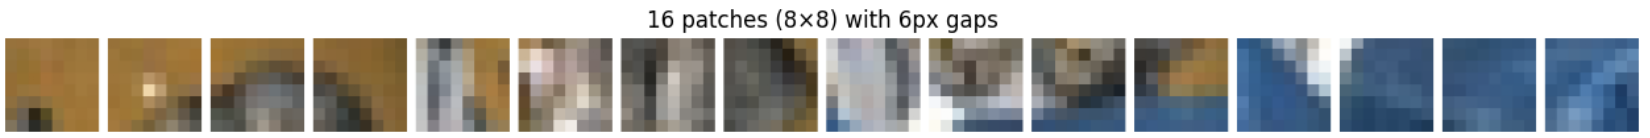

# Chapter4 Embedding

ÂâçÊ∫ñÂÇô„ÅØ‰ª•‰∏ä„Åß„Åô„ÄÇ</br>
„ÉÜ„Ç≠„Çπ„Éà„ÅÆ„Å®„Åç„Å®ÂêåÊßò„Å´„ÄÅ„Åì„ÅÆÂàÜÂâ≤„Åó„ÅüÁîªÂÉè„Çí„Éô„ÇØ„Éà„É´Á©∫Èñì„Å´ËêΩ„Å®„ÅóËæº„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ</br>
üîò **Options**: ‰ª•‰∏ã„ÅÆÈÅ∏ÊäûËÇ¢„Åã„ÇâÈÅ∏„Å≥„Åæ„Åó„Çá„ÅÜ„ÄÇ„ÅÑ„Çâ„Å™„ÅÑ„ÇÇ„ÅÆ„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„Çã„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì„ÄÇ

`torch.randn` `cat` `x.size()` `nn.Module`‚ÄÉ‚ÄÉ`PatchEmbeddings(config)` `0` `1`‚ÄÉ‚ÄÉ

In [109]:
class Embeddings(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.patch_embeddings = PatchEmbeddings(config)    
        self.cls_token = nn.Parameter(torch.randn(1, 1, 
                                      config.hidden_size))  
        num_patches = (config.image_size // config.patch_size) ** 2
        self.position_embeddings = \
        nn.Parameter(torch.randn(1,num_patches+1,config.hidden_size))  
    def forward(self, x):
        x = self.patch_embeddings(x)
        batch_size, _, _ = x.size()
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.position_embeddings
        return x  

ÂÖàÁ®ã„Åæ„ÅßË¶ã„Å¶„ÅÑ„ÅüÁîªÂÉè„Å´ÁµÑ„ÅøËæº„Åø„Åæ„Åô„ÄÇ

In [110]:
embed=Embeddings(config)

img1 = img1.unsqueeze(0) #„Éê„ÉÉ„ÉÅÊ¨°ÂÖÉ„ÇíËøΩÂä†

out=embed(img1)

print_formatted_tensor(out)

Tensor Size: [1, 17, 48]
tensor([
         [
           [ -4.23,  -3.57,   0.86,   0.73,   0.18,  -0.57,  -1.12,  -1.20,  -0.22,   1.26,  -0.39,  -3.06,  -1.59,   0.07,   1.06,  -0.30,   3.11,  -0.54,  -1.78,   1.82,  -0.72,  -0.96,  -0.65,   0.03,  -0.12,  -0.56,   0.46,   1.84,  -1.03,  -1.99,  -1.64,   0.16,  -0.17,  -4.49,   1.01,   1.16,   0.39,  -0.15,  -1.88,   0.47,  -0.77,  -0.43,   1.36,  -1.56,  -0.88,   2.04,  -1.38,  -0.93],
           [  0.25,   1.54,   0.08,   0.02,  -0.14,  -1.41,   0.47,  -0.43,  -0.57,   1.70,   1.73,  -0.84,   0.27,  -0.97,   0.06,   0.08,  -0.50,  -0.57,   0.22,   1.11,  -1.01,   0.99,   0.70,  -0.00,   0.28,  -0.24,  -0.06,  -1.46,   0.58,  -0.05,  -0.59,   0.48,  -0.62,   0.76,   0.61,   0.67,  -0.93,  -0.14,   0.10,   0.28,  -1.07,   0.03,  -0.52,  -0.81,   0.81,  -0.70,   0.55,   1.02],
           [ -1.37,   0.35,  -1.04,   0.75,  -1.24,  -0.33,  -3.04,   0.06,   1.37,   2.25,  -1.54,  -1.78,   0.19,   0.17,   0.82,   0.79,  -2.54,   0.31,  -0.8

**`Check Point`**  <label><input type="checkbox">  ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å™„ÉÜ„É≥„ÇΩ„É´„ÇíÂèñÂæó„Åß„Åç„Åü 
</label>